In [1]:
import data_visualisation as dv
import data_augmentation as da
import numpy as np
import matplotlib.pyplot as plt
# from PTBXL import PTBXL
import importlib
import sys
import seaborn as sns

importlib.reload(dv)
importlib.reload(da)

<module 'data_augmentation' from '/home/raaif/Desktop/Uni/y4/FYP/data_augmentation.py'>

In [4]:
thismodule = sys.modules[__name__]
NP_DATA = 'data/DAT_China.npz'

with np.load(NP_DATA, allow_pickle=True) as data:
    for k in data.keys():
        if k == 'Y_train_text' or k == 'Y_test_text' or k == 'Y_val_text':
            setattr(thismodule, k, data[k])
        else:
            setattr(thismodule, k, data[k].astype(float))

In [5]:
# print dist of labels of train data

x = np.unique(Y_train_text, return_counts=True)

for i in range(len(x[0])):
    print(f'{x[0][i]}: {x[1][i]}')

Brugada: 100
Normal: 199
RBBB: 33


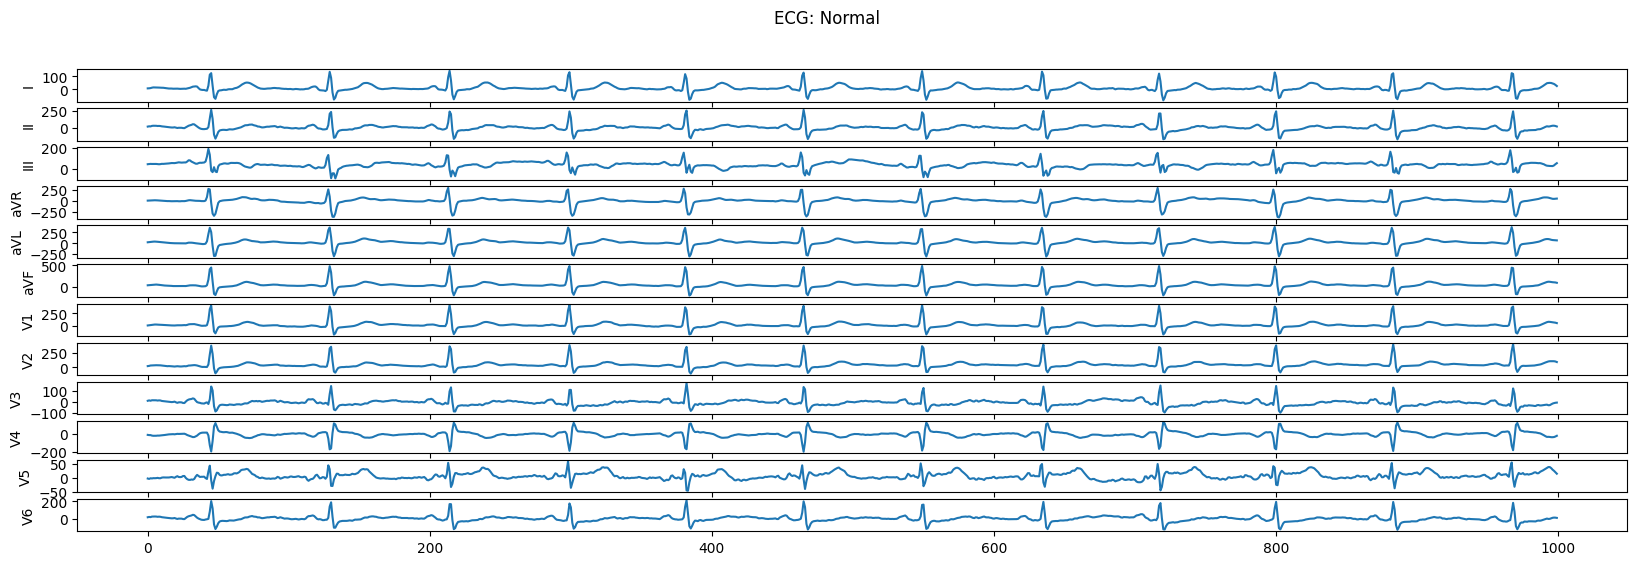

In [20]:
rand_index = np.random.randint(0, X_train.shape[0])
rand_sample = X_train[rand_index]
label = Y_train[rand_index]
text_label = Y_train_text[rand_index]

dv.plot_12_lead_ecg(rand_sample, text_label)

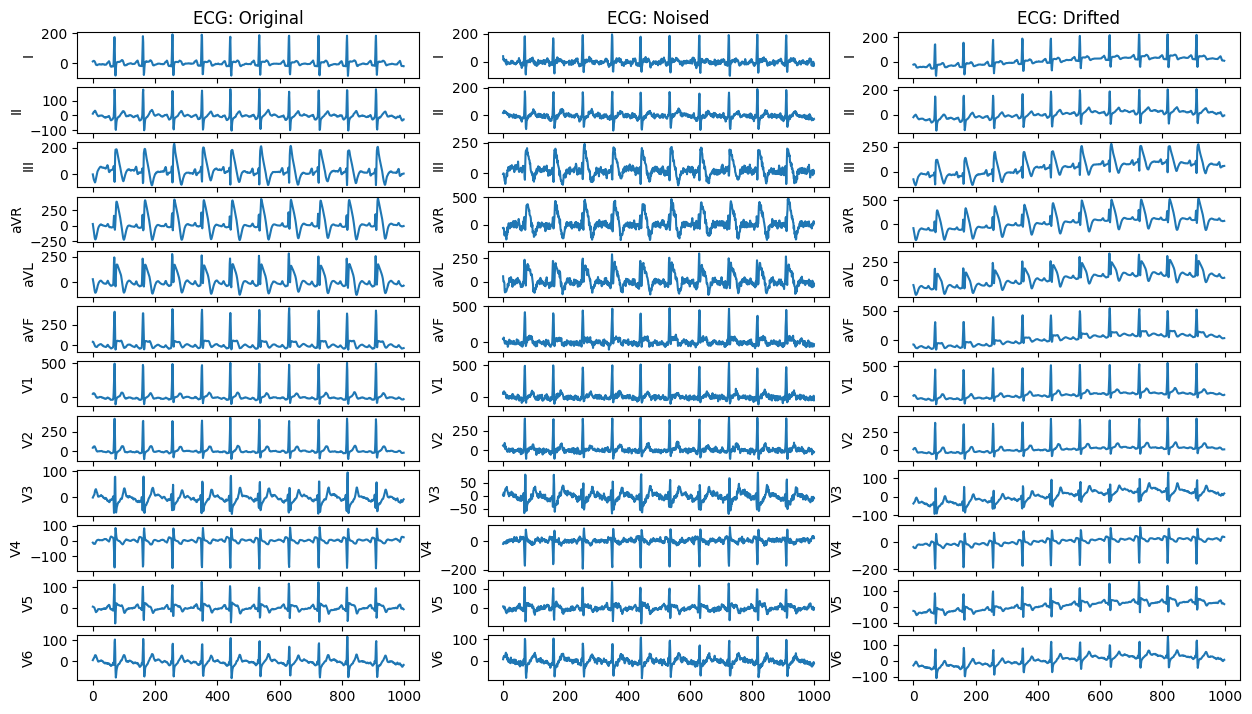

In [6]:
importlib.reload(dv)
importlib.reload(da)

rand_index = np.random.randint(0, X_train.shape[0])
rand_sample = X_train[rand_index]
label = Y_train[rand_index]
text_label = Y_train_text[rand_index]

noised_data = da.add_random_noise(rand_sample, (0.1,0.3))
drifted_data, drifts = da.add_random_baseline_drift(rand_sample, strength_range=(2,3), drift_wavelength_range=(700,2000))
# noised_drifted_data = da.add_random_noise(drifted_data, (0,0.1))

dv.plot_12_lead_ecgs([rand_sample, noised_data, drifted_data], labels=['Original', 'Noised', 'Drifted'])
# dv.plot_12_lead_ecgs([rand_sample, noised_data, drifted_data, noised_drifted_data], labels=['Original', 'Noised', 'Drifted', 'Noised and Drifted'])